In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 데이터 확인

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. 총 891개의 행
2. 문자열 피쳐 : 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'
3. 결측치가 존재하는 피쳐 : 'Age', 'Cabin', 'Embarked'

In [4]:
titanic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 전처리

### a. 문자열 피처 분포 확인

In [7]:
# cabin의 경우, 특이사항 발견

titanic_df['Cabin'].value_counts()

# 여러 Cabin이 한꺼번에 표기된 값들이 다수 존재
# Cabin 값의 첫 번째 알파벳이 선실 등급을 의미
# 즉, 한번에 여러 객실을 구매한 사람이 존재
# 선실 등급과 생존율 상관관계에 관심이 있으므로, 앞 문자만 추출하여 전처리 필요

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

### b. 결측치 처리

* 수치형 피쳐 'Age'는 평균값으로 대체 
* 문자열 피쳐 'Cabin'과 'Embarked'는 'N'으로 처리

In [10]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

titanic_df.isnull().sum().sum()

0

## EDA

### a. 성별에 따른 생존율 확인

In [11]:
# 해양 사고에서 구조 대상의 우선순위 : 여성, 아이들, 노약자. 
# 그렇다면 성별에 따라 실제로 여성의 생존율이 높았을까?

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

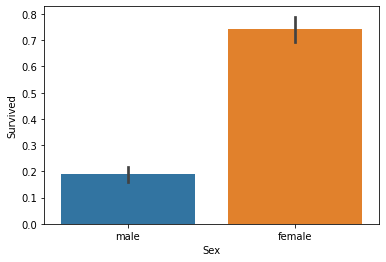

In [15]:
# 유의미한 차이가 있는 것으로 보인다!
# 그렇다면 범주에 따른 데이터를 플롯을 통해 한 번 더 확인하자. 
sns.barplot(data = titanic_df, x = 'Sex', y='Survived')

### b. 객실 등급에 따른 생존율

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

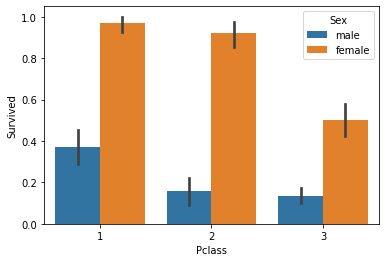

In [17]:
# 객실 등급에 따른 생존율을 비교해보자. 

sns.barplot(data = titanic_df, x = 'Pclass', y = 'Survived', hue = 'Sex')

* 여성 : 일등실과 이등실 생존율 비슷, 삼등실은 많이 떨어짐. 
* 남성 : 일등실 생존율이 이,삼등실 생존율보다 높음 

**결론** : 객실 등급은 유의미한 생존율 차이를 만들었음.

### c. 연령에 따른 생존율

In [20]:
# 연령에 따른 생존율을 확인해보자. 
# 그런데 Age 변수의 경우, 값의 종류가 많으므로, 범주화를 시도해보자. 

def get_category(age):
    if age <= -1:
        return 'Unknown'
    elif age <= 5:
        return 'Baby'
    elif age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 25:
        return 'Student'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

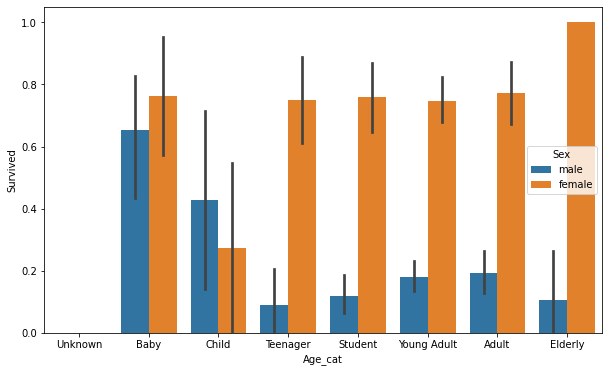

In [21]:
# 막대그래프의 크기 figure을 더 크게 
plt.figure (figsize = (10, 6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)

남/여 가리지 않고 Baby의 생존율이 높음을 확인할 수 있음

## Encoding

### 문자형 카테고리를 숫자형 카테고리로 인코딩

In [22]:
from sklearn import preprocessing

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = preprocessing.LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
    
    return df

encode_features(titanic_df)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [38]:
titanic_df = titanic_df.drop(columns = ['Name', 'PassengerId', 'Ticket', 'Age_cat'], axis = 1)

## Comparing models

In [39]:
# creating feature df & label df

X_titanic_df = titanic_df.drop(columns = ['Survived'], axis = 1)
y_titanic_df = titanic_df['Survived']

In [40]:
# split train data & test data (20% test data)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_titanic_df, y_titanic_df, 
                                                test_size = 0.2, random_state = 11)

In [34]:
# import API

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
# Scikit learn class 생성

dt = DecisionTreeClassifier(random_state = 11)
rf = RandomForestClassifier(random_state = 11)
lr = LogisticRegression(solver = 'liblinear')

In [41]:
# decision tree 학습/예습/평가
dt.fit(Xtrain, ytrain)
dt_pred = dt.predict(Xtest)
print(accuracy_score(ytest, dt_pred))

0.7877094972067039


In [42]:
# randomforest 학습/예습/평가
rf.fit(Xtrain, ytrain)
rf_pred = rf.predict(Xtest)
print(accuracy_score(ytest, rf_pred))

0.8547486033519553


In [43]:
# logistic regression 학습/예습/평가
lr.fit(Xtrain, ytrain)
lr_pred = lr.predict(Xtest)
print(accuracy_score(ytest, lr_pred))

0.8659217877094972


로지스틱 회귀 모델이 타 알고리즘에 비해 높은 accuracy score. 

하지만 확실한 지표 no no. 

Why? : 전처리 불완전, 데이터 부족

## Kfold : cross validation of Decision Tree model

In [45]:
from sklearn.model_selection import KFold

In [48]:
def kfold(classifier, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]

    for train_index, test_index in kfold.split(X_titanic_df):
        Xtrain, Xtest = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        ytrain, ytest = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        classifier.fit(Xtrain, ytrain)
        pred = classifier.predict(Xtest)
        accuracy = accuracy_score(ytest, pred)
        scores.append(accuracy)
    
    mean_score = np.mean(scores)
    print(mean_score)

kfold(dt, folds=5)


0.782298662984119


## GridSearchCV : searching for optimal hyperparameter

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
                'min_samples_split': [2,3,5], 'min_samples_leaf':[1,5,8]}

grid = GridSearchCV(dt, param_grid=parameters, scoring = 'accuracy', cv = 5)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)
print(grid.best_score_)
best = grid.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator 로 예측 및 평가 수행

predictions = best.predict(Xtest)
accuracy = accuracy_score(ytest, predictions)
print('test set에서의 decision tree classifier의 정확도:', accuracy)

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.7991825076332119
test set에서의 decision tree classifier의 정확도: 0.8715083798882681


**GridSearchCV**의 **최적 하이퍼파라미터**를 사용했더니, **정확도**가 **향상**되었다!

단, 일반적으로 이렇게까지 성능이 증가하기는 쉽지 않다. 

데이터셋의 크기가 작기 때문에 이런 결과가 나왔다!